# K-Means Clustering

## Dataset

### Layout

* Columns:
	* Customer ID
	* Genre
	* Age
	* Annual Income
	* Spending Score
* Rows: 100s of observations
	* Each row represents a customer from the mall
		* Features:
			* Genre
			* Age
			* Annual Income
			* Spending Score
		* Dependent variable:
			* Unknown

### Background

* Mall company data analysts collected data about their customers
* Mall company strategy team created customer spending score (1-100), which is based on how much a customer spends at the mall
	* Lower score = customer spends less
	* Higher score = customer spends more
* Data is based on customer spending over the last 1 year

### Goals

* Data analysts want to identify patterns within their customers
* Data analysts do not know what patterns to predict
* Build K-Means model to identify clusters of customer patterns
	* Create dependent variable
		* Take a finite number of values (4-5)
		* Each of the values will be a class of a dependent variable
		* Values will be the clusters

## Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Import Dataset

By default, since there are no dependent variables in the dataset, include all columns in the dataset.
However, one should exclude features that do not help in identifying patterns.

Only **Annual Income** and **Spending Score** columns are used as features:

* They can help identify patterns
* Are only used for learning purposes
* Visualization requires a 2-D plot so only 2 features are used, 1 feature per axis

Features excluded and why:

* **Customer ID**
    * Does not help identify patterns
* **Genre**
* **Age**
    * Each excluded only for learning purposes

The `y` dataset containing the dependent variables is not needed because the dataset contains no dependent variables.

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values

In [3]:
print(*X[:25], sep='\n')

[15 39]
[15 81]
[16  6]
[16 77]
[17 40]
[17 76]
[18  6]
[18 94]
[19  3]
[19 72]
[19 14]
[19 99]
[20 15]
[20 77]
[20 13]
[20 79]
[21 35]
[21 66]
[23 29]
[23 98]
[24 35]
[24 73]
[25  5]
[25 73]
[28 14]


## Use Elbow Method to Find Optimal Number of Clusters

Use a for loop to run the K-Means algorithm 10 times to determine the optimal number of clusters using the Elbow Method.

Initialize each K-Means algorithm with K-Means++ algorithm to avoid Random Initialization Trap.

The `interia_` attribte on the `kmeans` object instance provides the $WCSS$ value.

Chart contains **cluster** on x-axis and $WCSS$ computed on y-axis.

In [ ]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

To find the optimal number of clusters:

* Look for the kink (elbow) in the chart
* This is the optimal number of clusters to use
* Occurs when $WCSS$ stops dropping rapidly

Optimal number of clusters is **5**.

## Train K-Means Model on Dataset

The `fit_predict` method trains the model and predicts the `y_means` array of clusters, 1-5, using zero-based indexes.

In [22]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

In [25]:
print(y_kmeans)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


## Visualize Clusters

Create a scatter plot of each cluster and their centroids:

* Row index must specify all the customers for current cluster number: `y_kmeans == <cluster no.>`
* Index $0$ is the column index for **Annual Income** on x-axis
* Index $1$ is the column index for **Spending Score** on y-axis

`cluster_centers_` attribute of `kmeans` object returns a 2-D array containing the rows for the centroids and columns containing their coordinates.

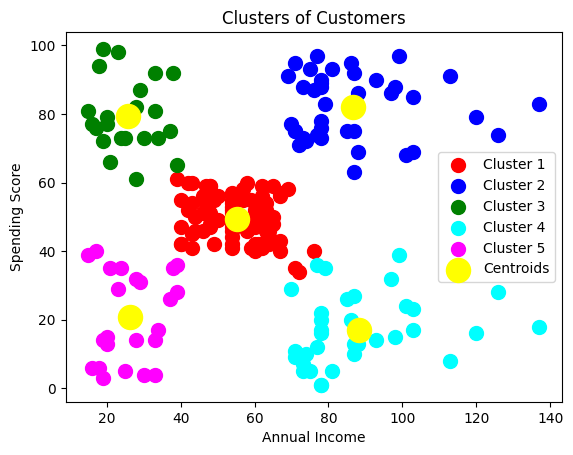

In [36]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, color='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, color='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, color='green', label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, color='cyan', label='Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=100, color='magenta', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, color='yellow', label='Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income ($)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## Analysis

* **Cluster 5** = customers with low annual income and spending is low in the mall
* **Cluster 4** = customers with high annual income and spending is low in the mall
* **Cluster 3** = customers with low annual income and spending is high in the mall
* **Cluster 2** = customers with high annual income and spending is high in the mall
* **Cluster 1** = customers with average annual income and spending normally in the mall